<a href="https://colab.research.google.com/github/KaanYigitsoy13/Data_Jobs_Salaries_2023_EDA/blob/main/salary_influence_factors_analysis_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction and Feature Overview

This dataset was retrieved from the page https://ai-jobs.net/salaries/download/

This site collects salary information anonymously from professionals all over the world in the AI, ML, Data Science space and makes it publicly available for anyone to use, share and play around with.

The primary goal is to have data that can provide better guidance in regards to what's being paid globally. So newbies, experienced pros, hiring managers, recruiters and also startup founders or people wanting to make a career switch can make better informed decisions.

## Analysis Purpose
How do factors such as experience level, type of employment, professional role, location of residence and work, proportion of remote work, and organizational size influence the variations in salary, when measured in USD?

### Dataset Description

Dataset description
The dataset contains 11 columns with the following characteristics:

* work_year: The year the salary was paid.
* experience_level: The experience level in the job during the year with the following possible values:
  * EN: Entry-level / Junior
  * MI: Mid-level / Intermediate
  * SE: Senior-level / Expert
  * EX: Executive-level / Director
* employment_type: The type of employement for the role:
  * PT: Part-time
  * FT: Full-time
  * CT: Contract
  * FL: Freelance
* job_title: The role worked in during the year.
* salary: The total gross salary amount paid.
* salary_currency: The currency of the salary paid as an ISO 4217 currency code.
* salary_in_usd: The salary in USD (FX rate divided by avg. USD rate of respective year via data from fxdata.foorilla.com).
* employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
* remote_ratio: The overall amount of work done remotely, possible values are as follows:
  * 0: No remote work (less than 20%)
  * 50: Partially remote/hybrid
  * 100: Fully remote (more than 80%)
* company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.
* company_size: The average number of people that worked for the company during the year:
  * S: less than 50 employees (small)
  * M: 50 to 250 employees (medium)
  * L: more than 250 employees (large)




## Data Quality Assesment

### Import Packages

In [1]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np

# Importing libraries for static and statistical data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Load the Data

In [2]:
# Loading the original dataset from a CSV file
data_original = pd.read_csv('salaries.csv')

### Explore the Dataframe

In [3]:
# Displaying the first few rows of the original dataset
data_original.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,199000,USD,199000,US,0,US,M
1,2023,SE,FT,Data Scientist,196760,USD,196760,US,0,US,M
2,2023,SE,FT,Machine Learning Engineer,90000,USD,90000,CO,0,CO,M
3,2023,SE,FT,Machine Learning Engineer,70000,USD,70000,CO,0,CO,M
4,2023,SE,FT,ML Engineer,324000,USD,324000,US,0,US,M


In [4]:
# Displaying the last few rows of the original dataset
data_original.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
8108,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
8109,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
8110,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
8111,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
8112,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [5]:
# Generating summary statistics of the dataframe
data_original.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,8113.000000,8.113000e+03,8113.000000,8113.000000
mean,2022.715149,1.767508e+05,149305.354616,39.831135
std,0.559426,4.746788e+05,64013.143735,48.270212
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.060000e+05,105000.000000,0.000000
50%,2023.000000,1.450000e+05,142200.000000,0.000000
75%,2023.000000,1.900000e+05,185900.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
# Inspecting data types and checking for null values in the dataframe
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8113 entries, 0 to 8112
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8113 non-null   int64 
 1   experience_level    8113 non-null   object
 2   employment_type     8113 non-null   object
 3   job_title           8113 non-null   object
 4   salary              8113 non-null   int64 
 5   salary_currency     8113 non-null   object
 6   salary_in_usd       8113 non-null   int64 
 7   employee_residence  8113 non-null   object
 8   remote_ratio        8113 non-null   int64 
 9   company_location    8113 non-null   object
 10  company_size        8113 non-null   object
dtypes: int64(4), object(7)
memory usage: 697.3+ KB


#### Findings


The dataset does not contain any null values.

The summary statistics for numerical columns such as work_year, salary_in_usd, and remote_ratio appear to be reasonable and do not indicate any anomalies or incorrect data.

The data types (dtypes) for each column seem to be correctly assigned.

Overall, the data appears to be clean and well-organized.

## Data Preparation

In [8]:
# Creating a copy of the original dataframe to preserve the original data
data = data_original.copy()

In [9]:
# Combining 'Machine Learning Engineer' and 'ML Engineer' as they are the same title.
data['job_title'] = data['job_title'].str.replace('Machine Learning Engineer', 'ML Engineer')

In [12]:
# Dropping the salary column as we will be focusing on salary_in_usd for financial analysis and to reduce dimensionality.
data.drop('salary', axis=1, inplace=True)

In [13]:
# Transforming categorical string values into numerical values to facilitate correlation analysis
data['company_size_num'] = data['company_size'].replace({'S': 0, 'M': 1, 'L': 2})
data['experience_level_num'] = data['experience_level'].replace({'EN': 0, 'MI': 1, 'SE': 2, 'EX':3})

# Creating a descriptive label for remote_ratio to indicate working model
data['remote_ratio_num'] = data['remote_ratio']
data['remote_ratio'] = data['remote_ratio'].replace({0: 'Remote', 50: 'Hybrid', 100: 'On-site',})
# Renaming the 'remote_ratio' column to 'work_model' for better clarity
data = data.rename(columns={'remote_ratio': 'work_model'})

# Creating a column to indicate whether the employee and company are located in the same country
data['company_employee_location'] = np.where(data['company_location'] == data['employee_residence'], 'Same Country', 'Different Country')

## Data Visualization

### High-Level Analysis

In [15]:
# Generating summary statistics for the transformed data
data.describe()

,work_year,salary_in_usd,company_size_num,experience_level_num,remote_ratio_num
count,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000
mean,2022.715149,149305.354616,1.066683,1.729693,39.831135
std,0.559426,64013.143735,0.321586,0.604289,48.270212
min,2020.000000,15000.000000,0.000000,0.000000,0.000000
25%,2023.000000,105000.000000,1.000000,2.000000,0.000000
50%,2023.000000,142200.000000,1.000000,2.000000,0.000000
75%,2023.000000,185900.000000,1.000000,2.000000,100.000000
max,2023.000000,450000.000000,2.000000,3.000000,100.000000


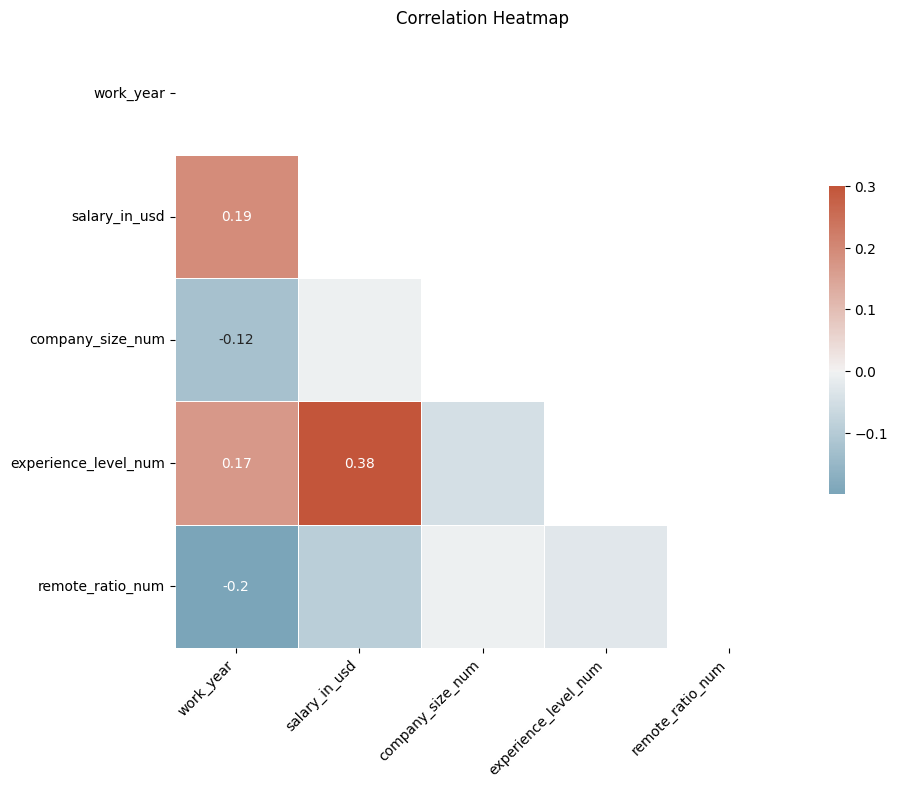

In [36]:
# Calculating the correlation matrix for numerical data
correlation_matrix = data.corr(numeric_only=True)

# Creating a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Setting up the matplotlib figure with specified size
plt.figure(figsize=(10, 8))

# Generating a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Creating a mask for displaying annotations only for significant correlations (|correlation| >= 0.10)
annot_mask = (correlation_matrix <= -0.10) | (correlation_matrix >= 0.10)

# Custom annotations: display correlation values for significant correlations, leave others blank
annot_text = np.where(annot_mask, correlation_matrix.round(2).astype(str), '')

# Drawing the heatmap with the specified properties
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=annot_text, fmt='')

# Adjusting plot elements for better readability
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha='right')

plt.show()


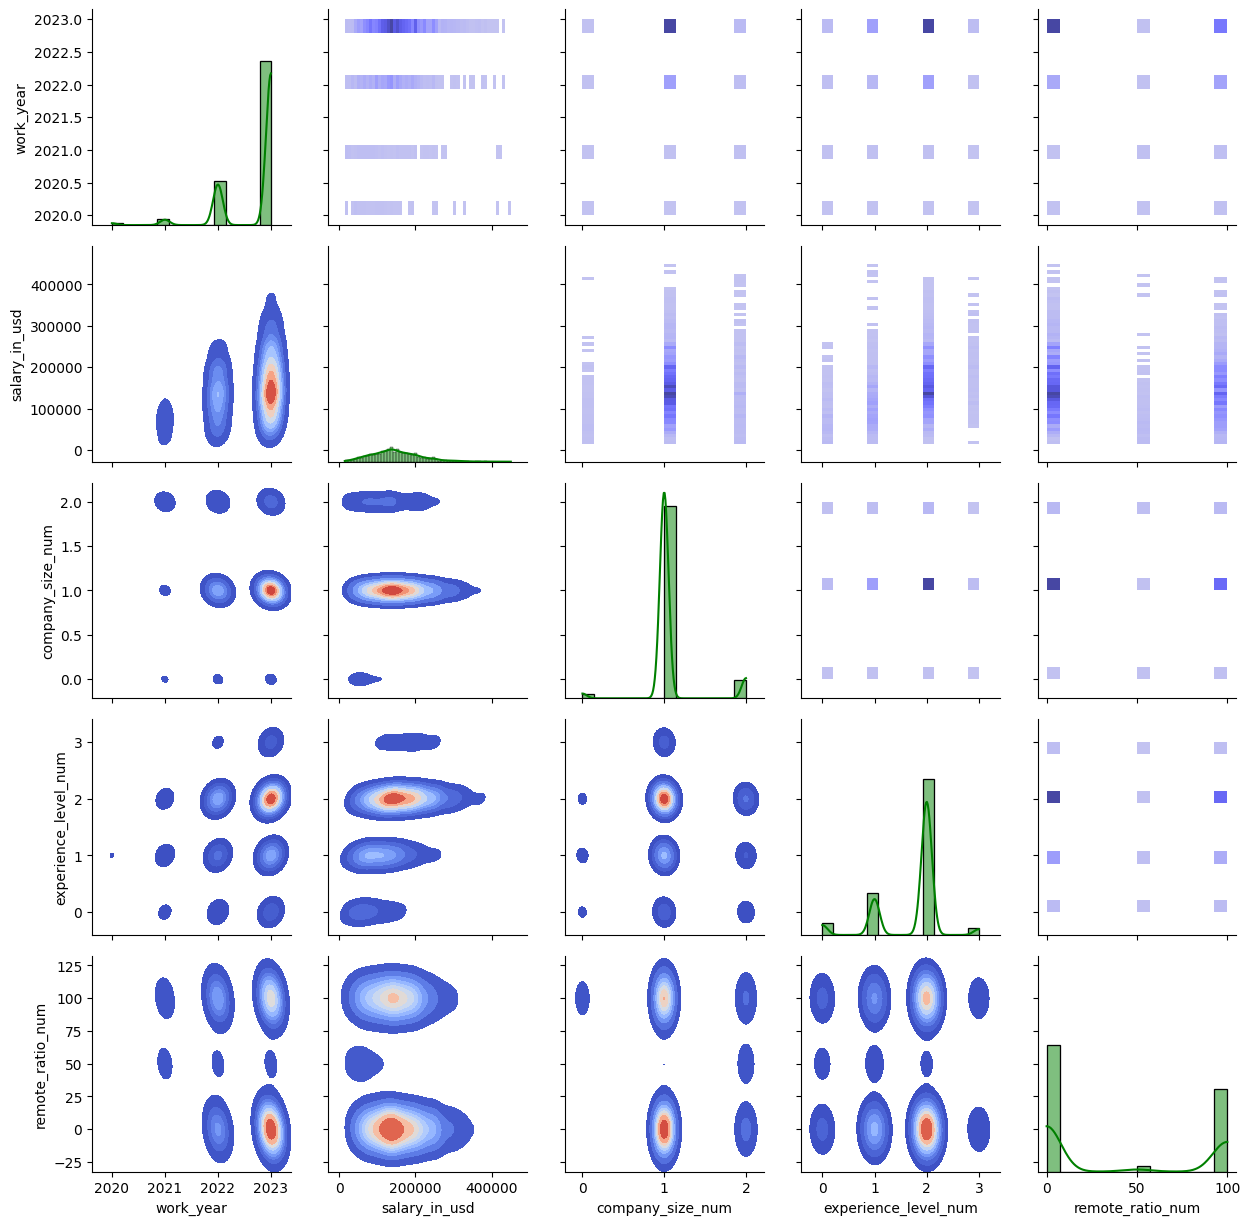

In [17]:
# Creating a PairGrid to visualize pairwise relationships in the dataset
g = sns.PairGrid(data)

# Mapping different types of plots to sections of the PairGrid
g.map_upper(sns.histplot, color='darkblue')          # Histograms in the upper triangle
g.map_diag(sns.histplot, kde=True, color='green')   # Histogram with KDE overlay on the diagonal
g.map_lower(sns.kdeplot, fill=True, cmap='coolwarm') # KDE in the lower triangle with color map

plt.show()

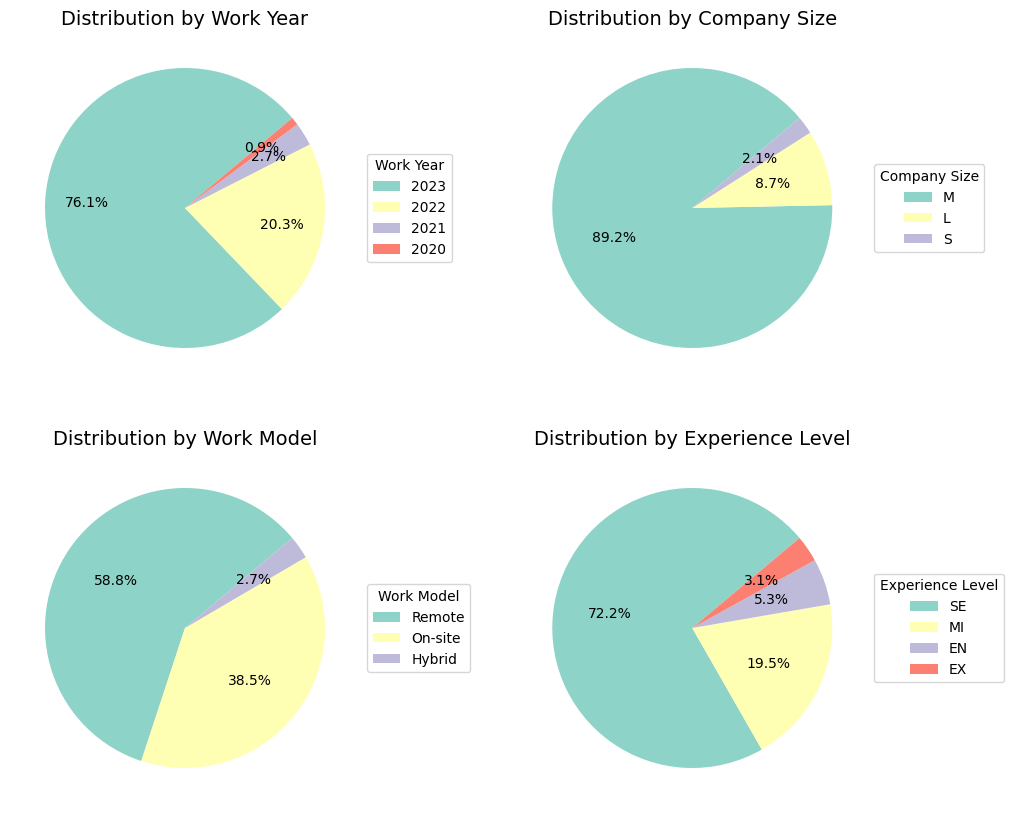

In [37]:
# Generating value counts for categorical variables
work_year_pie = data['work_year'].value_counts()
work_model_pie = data['work_model'].value_counts()
company_size_pie = data['company_size'].value_counts()
experience_level_pie = data['experience_level'].value_counts()

# Setting a color palette
colors = sns.color_palette('Set3')

# Creating subplots for pie charts
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Pie chart showing the distribution by Work Year
ax[0, 0].pie(work_year_pie.values, labels=None, autopct='%1.1f%%', startangle=40, colors=colors, pctdistance=0.7)
ax[0, 0].set_title('Distribution by Work Year', fontsize=14)
ax[0, 0].legend(work_year_pie.index, title="Work Year", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Pie chart showing the distribution by Work Model
ax[1, 0].pie(work_model_pie.values, labels=None, autopct='%1.1f%%', startangle=40, colors=colors)
ax[1, 0].set_title('Distribution by Work Model', fontsize=14)
ax[1, 0].legend(work_model_pie.index, title="Work Model", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Pie chart showing the distribution by Company Size
ax[0, 1].pie(company_size_pie.values, labels=None, autopct='%1.1f%%', startangle=40, colors=colors)
ax[0, 1].set_title('Distribution by Company Size', fontsize=14)
ax[0, 1].legend(company_size_pie.index, title="Company Size", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Pie chart showing the distribution by Experience Level
ax[1, 1].pie(experience_level_pie.values, labels=None, autopct='%1.1f%%', startangle=40, colors=colors)
ax[1, 1].set_title('Distribution by Experience Level', fontsize=14)
ax[1, 1].legend(experience_level_pie.index, title="Experience Level", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


Results

A moderate correlation was observed between the level of experience and the salary, denominated in USD.

Some level of correlation was identified between the work year, remote work ratio, and salary in USD.

The salary in USD appears to be slightly right skewed, with a mean of approximately 150k and a standard deviation of roughly 65k.

Certain metrics demonstrate an uneven distribution and should be considered during a more detailed analysis.

A considerable majority of the data, 76.1%, pertains to the year 2023.

A noteworthy portion, 89.2%, of the companies represented in the dataset are classified as medium-sized businesses.

Remote positions comprise 58.8% of the roles within the dataset.

Positions that require senior-level experience constitute 72.2% of the data.

### Detailed Analyses

#### Salary Data Distribution

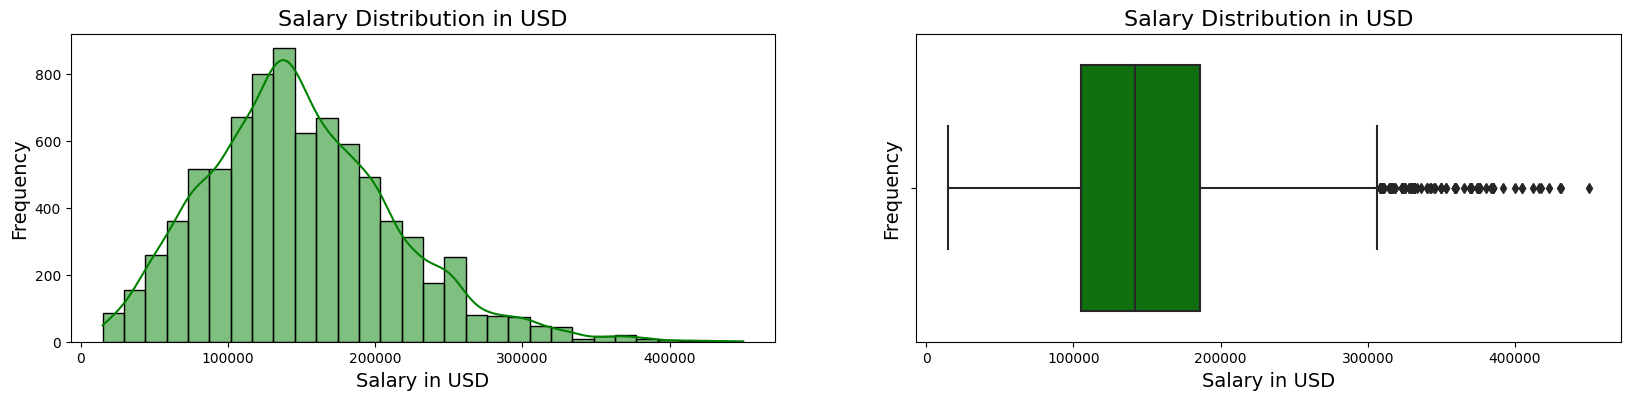

count      8113.000000
mean     149305.354616
std       64013.143735
min       15000.000000
25%      105000.000000
50%      142200.000000
75%      185900.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [38]:

# Creating a histogram with a Kernel Density Estimate (KDE)
fig, ax = plt.subplots(1, 2, figsize=(20, 4))
sns.histplot(data['salary_in_usd'], bins=30, kde=True, color='green', edgecolor='k', ax=ax[0])

# Adding titles and labels
ax[0].set_title('Salary Distribution in USD', fontsize=16)
ax[0].set_xlabel('Salary in USD', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)

sns.boxplot(x=data['salary_in_usd'], color='green', ax=ax[1])
# Adding titles and labels
ax[1].set_title('Salary Distribution in USD', fontsize=16)
ax[1].set_xlabel('Salary in USD', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)

plt.show()

# Adding summary statistics of 'salary_in_usd'
data['salary_in_usd'].describe()

#### Company Size & Salary

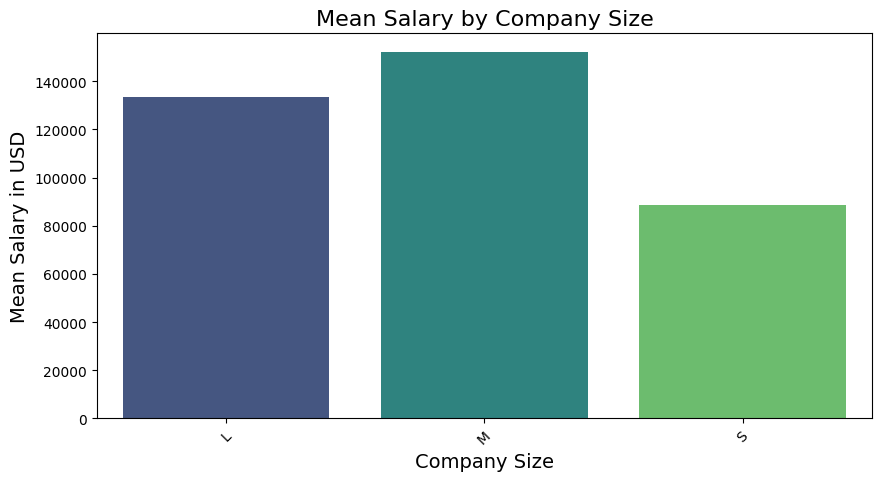

In [21]:
# Function for calculating the mean and median of the target column, grouped by the specified column

def get_mean_median(data, group_by, target_col):
    mean = data.groupby(group_by)[target_col].mean()
    median = data.groupby(group_by)[target_col].median()
    return mean, median

# Calculating the mean salary for each company size
cs_mean, _ = get_mean_median(data, 'company_size', 'salary_in_usd')




# Ploting the mean salary values grouped by company size
plt.figure(figsize=(10,5))

barplot = sns.barplot(x=cs_mean.index, y=cs_mean.values, palette='viridis')
plt.title('Mean Salary by Company Size', fontsize=16)
plt.xlabel('Company Size', fontsize=14)
plt.ylabel('Mean Salary in USD', fontsize=14)
plt.tick_params(axis='x', rotation=45)

plt.show()

##### Company Size & Salary Results

The highest mean salary is observed in medium-sized businesses, while the lowest is seen in small-sized businesses. This may suggest that medium-sized businesses, often in a phase of growth and expansion, are willing to invest more in talent. On the other hand, small businesses, which may have limited budgets, tend to offer lower average salaries. Conversely, large-sized businesses may have well-established pay structures and strict budget allocations, potentially leading to a relatively lower mean salary compared to medium-sized businesses.

However, it's crucial to interpret these findings with caution, as large-sized businesses and small-sized businesses are underrepresented in the dataset, making up just 8.7% and 2.1% respectively. Hence, the data may not fully capture the salary distribution across different company sizes.

#### Experience Level & Salary

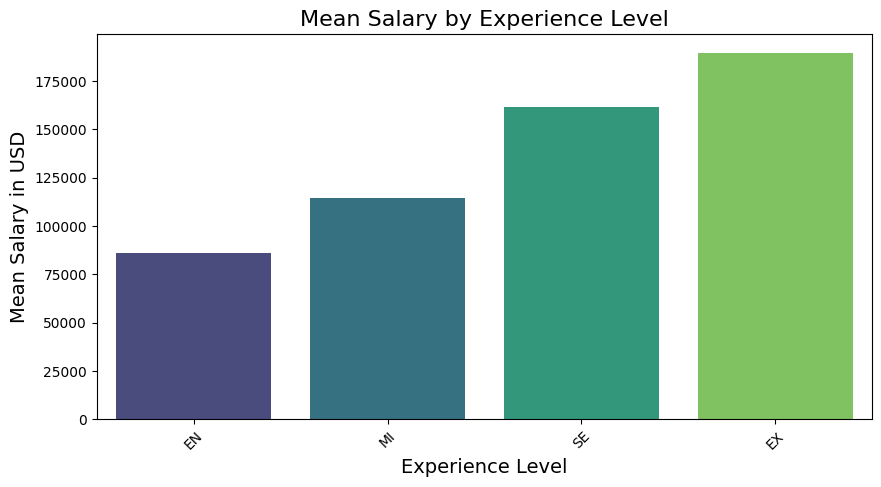

In [22]:
# Calculating the mean and median salary for each experience level
ex_mean, ex_median = get_mean_median(data, 'experience_level', 'salary_in_usd')


# Defining the order of categories
ordered_categories = ['EN', 'MI', 'SE', 'EX']



# Plotting the mean salary values grouped by experience level with a specified order
plt.figure(figsize=(10,5))

sns.barplot(x=ex_mean.index, y=ex_mean.values, palette='viridis', order=ordered_categories)
plt.title('Mean Salary by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Mean Salary in USD', fontsize=14)
plt.tick_params(axis='x', rotation=45)

plt.show()

Experience Level & Salary Results

We observe a clear correlation between seniority level and salary in USD, as depicted in the plot. There is a consistent increase in salary from entry-level positions, progressing to mid-level, senior, and ultimately executive roles. This trend aligns well with real-world expectations, where more experience and responsibility typically command higher compensation. However, it may be worthwhile to delve deeper into other factors, such as the industry, region, or company size, to better understand nuances in the data and validate the observed trend across different contexts.

#### Work Model & Salary

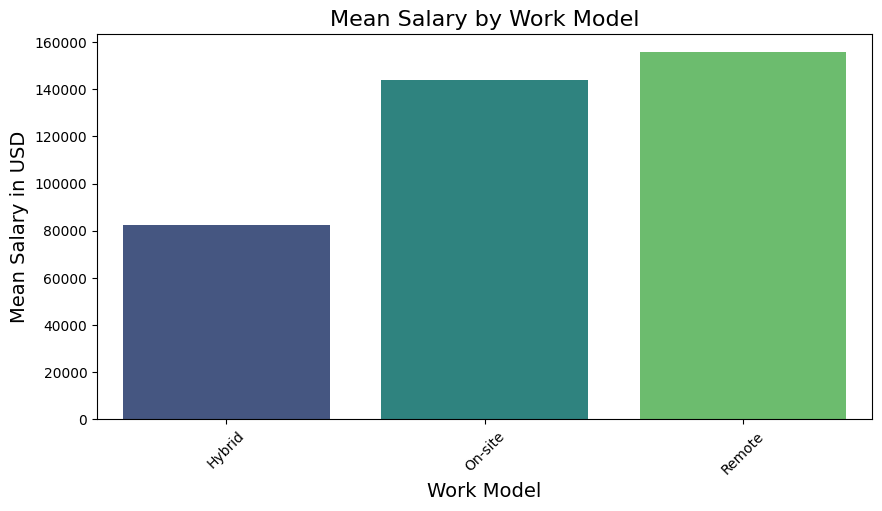

In [23]:
# Calculating the mean and median salary for each work model
wm_mean, wm_median = get_mean_median(data, 'work_model', 'salary_in_usd')




# Plotting the mean salary values grouped by work model
plt.figure(figsize=(10,5))

barplot = sns.barplot(x=wm_mean.index, y=wm_mean.values, palette='viridis')
plt.title('Mean Salary by Work Model', fontsize=16)
plt.xlabel('Work Model', fontsize=14)
plt.ylabel('Mean Salary in USD', fontsize=14)
plt.tick_params(axis='x', rotation=45)

plt.show()

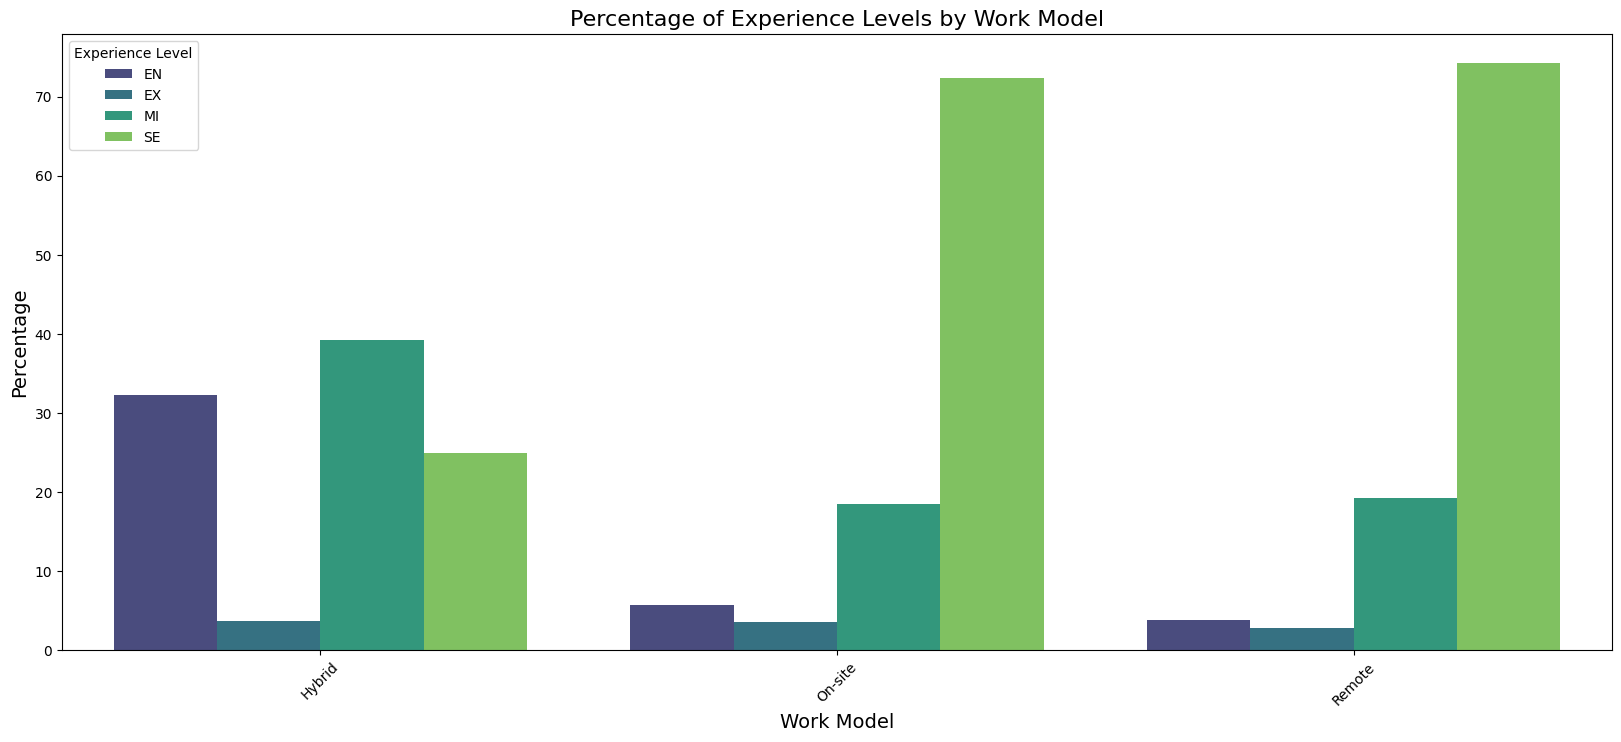

In [24]:
# Grouping data by work model and experience level, calculating the count for each combination
grouped_data = data.groupby(['work_model', 'experience_level']).size().reset_index(name='count')

# Calculating total counts for each work model to later find percentages
total_counts = grouped_data.groupby('work_model')['count'].sum().reset_index(name='total_count')

# Merging the total counts back into the grouped data
merged_data = pd.merge(grouped_data, total_counts, on='work_model')

# Calculating the percentage of each experience level for each work model
merged_data['percentage'] = (merged_data['count'] / merged_data['total_count']) * 100


# Plotting the percentage of experience levels for each work model
plt.figure(figsize=(20,8))

sns.barplot(data=merged_data, x='work_model', y='percentage', hue='experience_level', palette='viridis')

plt.title('Percentage of Experience Levels by Work Model', fontsize=16)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Work Model', fontsize=14)
plt.tick_params(axis='x', rotation=45)
plt.legend(title='Experience Level')
plt.show()

Work Model & Salary Results

The analysis reveals that positions allowing remote work tend to offer slightly higher mean salaries compared to those requiring on-site presence. This observation could potentially be attributed to the reduced overhead costs for companies that predominantly operate remotely, as they may not need to invest heavily in on-site facilities and resources. Consequently, these companies might be more inclined to allocate a portion of these savings to employee salaries.

On the contrary, positions offering a hybrid working model exhibit the lowest average salary among the three categories. It is reasonable considering the Entry level position ratio is highest for Hhbrid jobs. However, it's important to approach this finding cautiously, as hybrid positions make up a mere 2.7% of the data. Such underrepresentation could potentially skew the average salary figure for this category.

#### Job Title & Salary

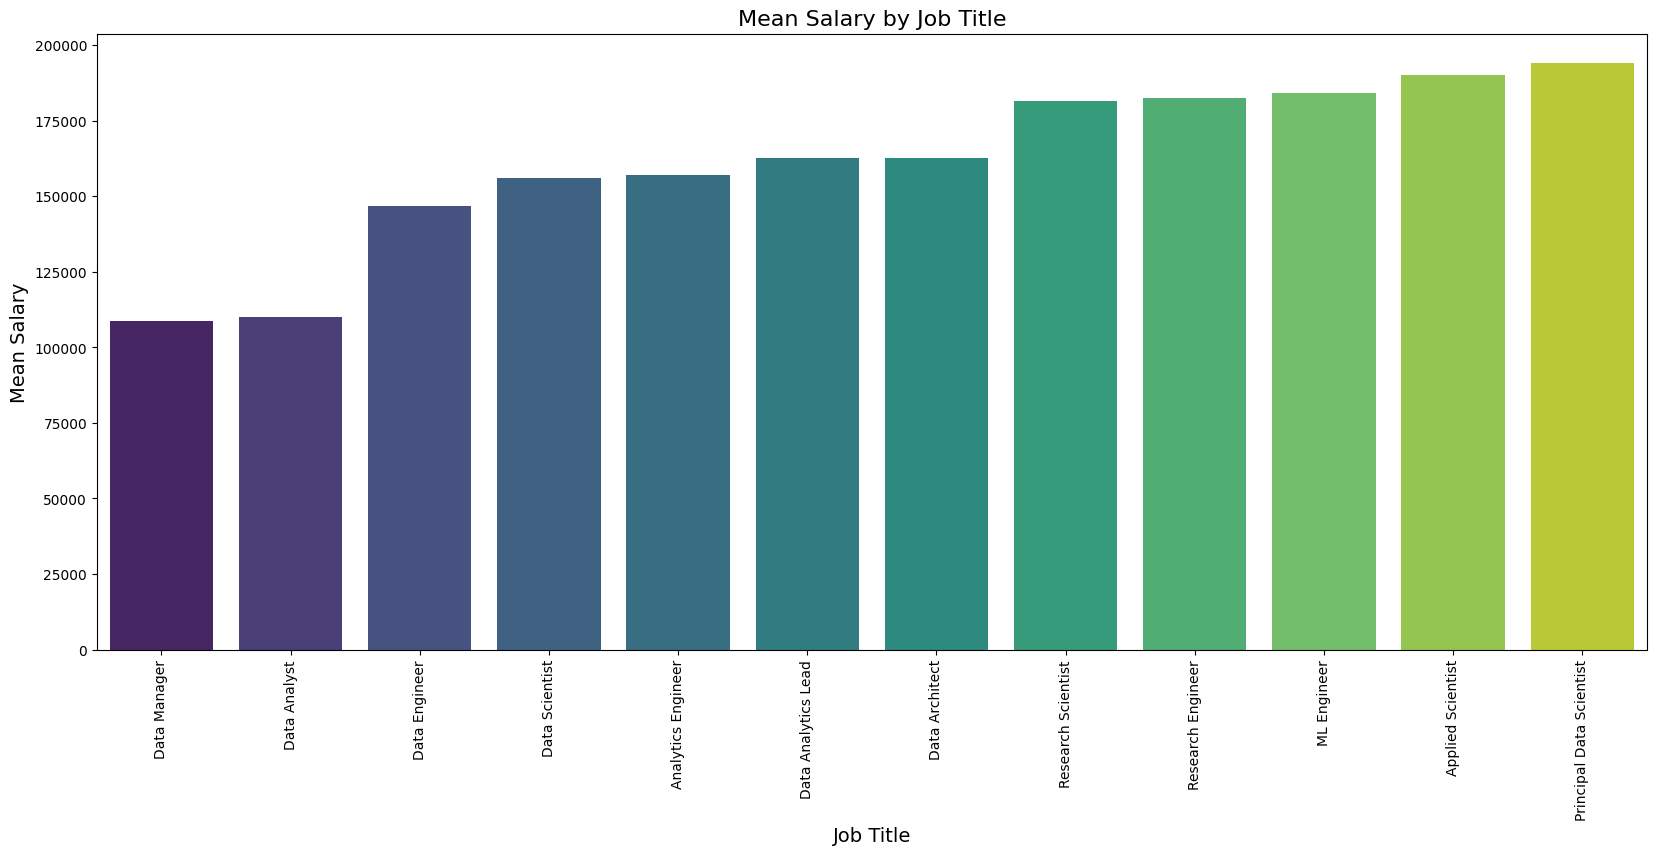

In [39]:
top_titles = data['job_title'].value_counts()
top_titles = top_titles.head(10).index.tolist()

top_paying_titles = data.sort_values('salary_in_usd', ascending=False).head(10)
top_paying_titles = top_paying_titles['job_title'].value_counts().index.tolist()

# Adding unique top-paying titles to the list of top titles
for title in top_paying_titles:
  if title not in top_titles:
    top_titles.append(title)

# Removing titles with few entries
top_titles.remove('Analytics Engineering Manager')
top_titles.remove('Applied Machine Learning Scientist')
top_titles.remove('AI Scientist')


# Calculating mean salary for each title
title_mean, _= get_mean_median(data[data['job_title'].isin(top_titles)],
                               'job_title',
                               'salary_in_usd')

title_mean = title_mean.sort_values()


# Plotting mean salary for each job title
plt.figure(figsize=(20,8))

sns.barplot(x=title_mean.index, y=title_mean.values, palette='viridis')
plt.title('Mean Salary by Job Title', fontsize=16)
plt.ylabel('Mean Salary', fontsize=14)
plt.xlabel('Job Title', fontsize=14)
plt.tick_params(axis='x', rotation=90)
plt.show()

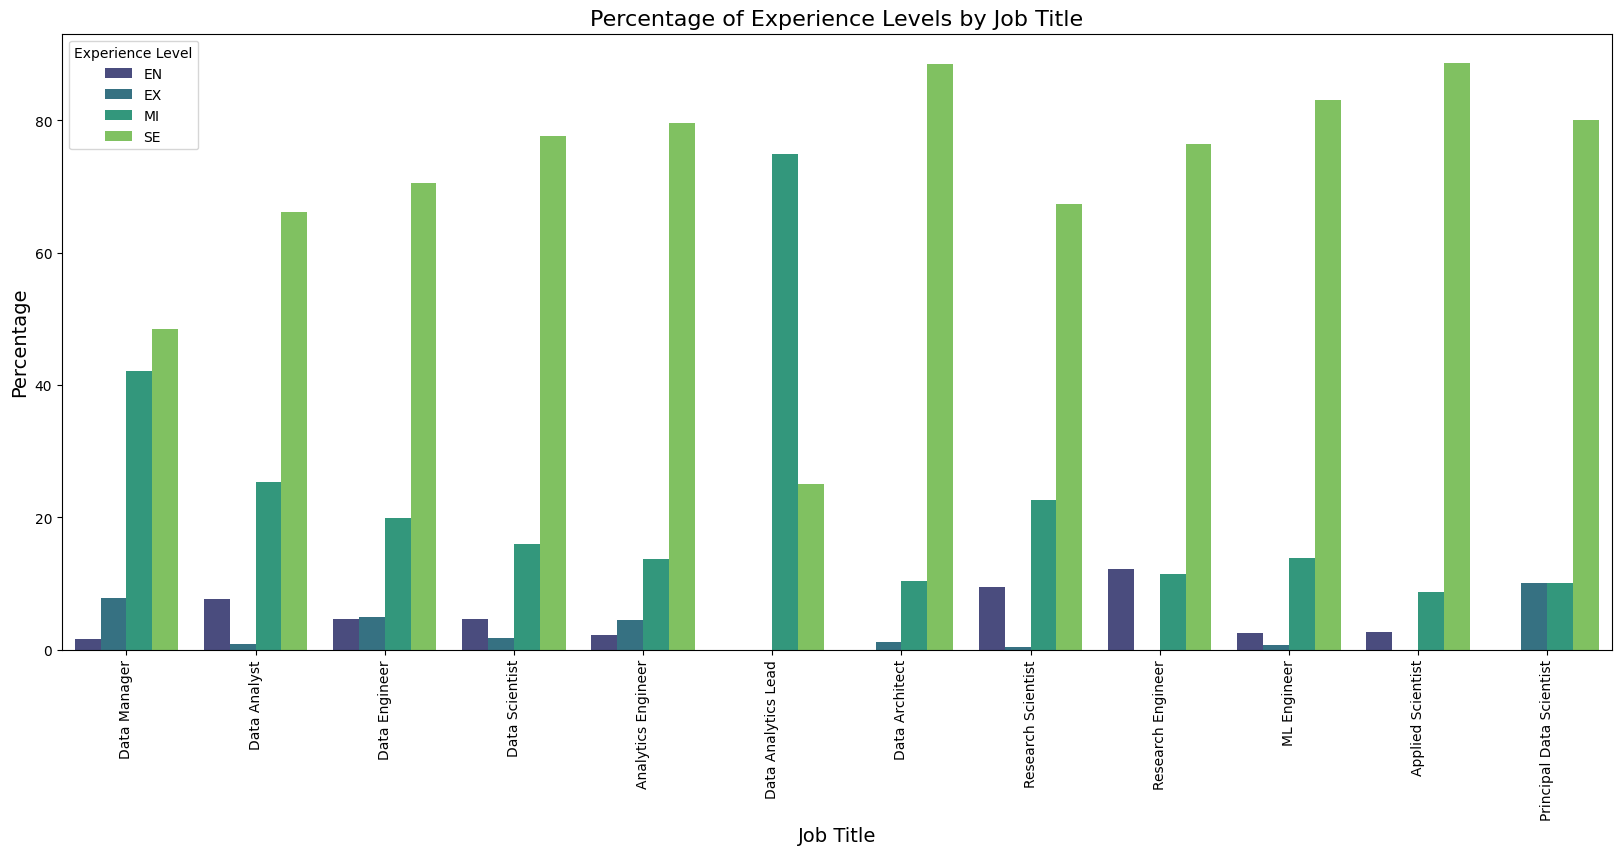

In [40]:
# Calculating the percentage of each experience level for each job title
grouped_data = data[data['job_title'].isin(top_titles)].groupby(['job_title', 'experience_level']).size().reset_index(name='count')
total_counts = grouped_data.groupby('job_title')['count'].sum().reset_index(name='total_count')
merged_data = pd.merge(grouped_data, total_counts, on='job_title')
merged_data['percentage'] = (merged_data['count'] / merged_data['total_count']) * 100

order = title_mean.index.tolist()

# Creating a grouped bar plot for experience levels showing percentages
plt.figure(figsize=(20,8))

sns.barplot(data=merged_data, x='job_title', y='percentage', hue='experience_level', palette='viridis', order=order)

plt.title('Percentage of Experience Levels by Job Title', fontsize=16)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Job Title', fontsize=14)
plt.tick_params(axis='x', rotation=90)
plt.legend(title='Experience Level')
plt.show()



Job Title & Salary Results

Based on our analysis, the job titles associated with the lowest salaries are "Data Manager" and "Data Analyst." In contrast, we observe a significant increase in compensation for positions such as "Data Engineer," "Data Scientist," "Analytics Engineer," and "Data Architect." The roles commanding the highest salaries include "Research Scientist," "Research Engineer," "ML Engineer," "Applied Scientist," and "Principal Data Scientist."

The reason behind this salary disparity could be attributed to the varying levels of expertise, responsibilities, and skills required for these roles. For instance, positions like "Data Manager" and "Data Analyst" might typically require less specialized technical skills compared to roles like "Data Scientist" or "ML Engineer," which often demand proficiency in machine learning, programming, and statistical analysis. Higher-level positions such as "Principal Data Scientist" and "Research Scientist" might involve leading projects and conducting advanced research, thereby commanding higher salaries due to their added responsibilities and the specialized knowledge required.

Interestingly, we do not observe the anticipated trend wherein the prevalence of Executive and Senior-level positions increases in tandem with the average wage for each title. For instance, the title 'Principal Data Scientist' does not exhibit a higher proportion of Senior-level roles compared to 'Data Scientist'. Moreover, it even has fewer Executive-level positions compared to 'Data Manager'.

In our Experience & Salary analysis, we have identified a correlation between experience level and salary, indicating that roles with higher levels of responsibility and experience typically command higher salaries. Given this, the current observation might suggest several possibilities. It could imply that certain titles, despite having similar or even lesser seniority, may demand specialized skills that command higher pay. Alternatively, there may be external factors such as industry demand, geographical location, or company size that could be influencing these trends.

#### Location & Salary

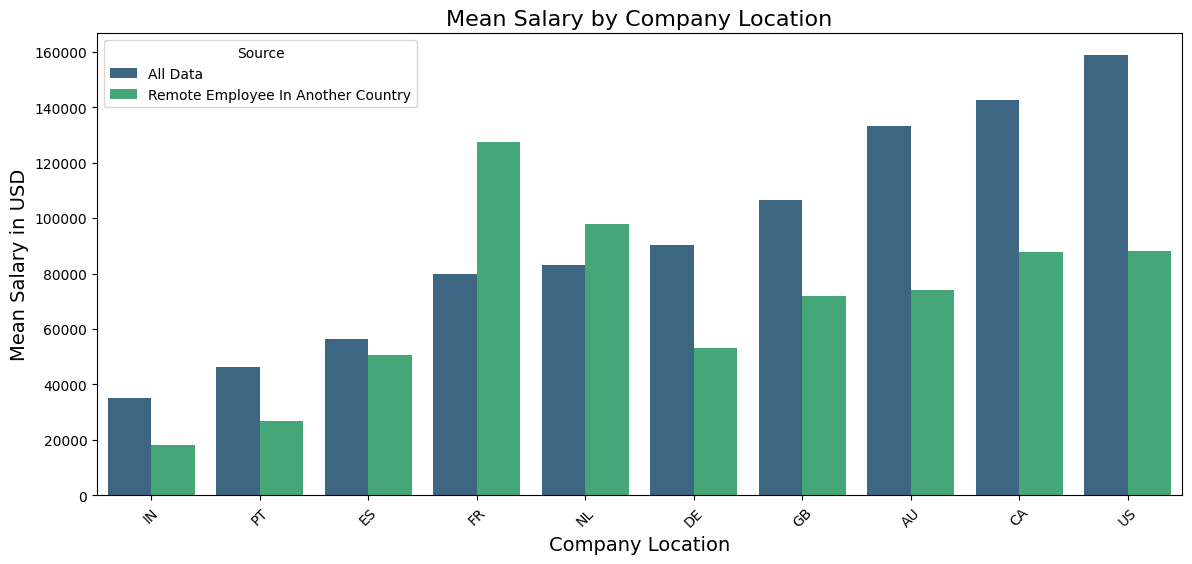

In [27]:
# Retrieving the top 10 company locations
top_10_company_location = data['company_location'].value_counts()
top_10_company_location = top_10_company_location.head(10).index.tolist()


# Calculating means
loc_mean, _ = get_mean_median(data[data['company_location'].isin(top_10_company_location)], 'company_location', 'salary_in_usd')
loc_mean = loc_mean.sort_values()

# Selecting data where employees are in a different country
location_different = data[(data['company_employee_location'] == 'Different Country') & data['company_location'].isin(top_10_company_location)]
loc_diff_mean, _ = get_mean_median(location_different, 'company_location', 'salary_in_usd')


# Creating a barplot
plt.figure(figsize=(14, 6))

sns.barplot(
    x='Location',
    y='Mean Salary',
    hue='Source',
    data=pd.concat([
        pd.DataFrame({
            'Location': loc_mean.index,
            'Mean Salary': loc_mean.values,
            'Source': ['All Data'] * len(loc_mean)
        }),
        pd.DataFrame({
            'Location': loc_diff_mean.index,
            'Mean Salary': loc_diff_mean.values,
            'Source': ['Remote Employee In Another Country'] * len(loc_diff_mean)
        })
    ], ignore_index=True),
    palette='viridis',
)

plt.title('Mean Salary by Company Location', fontsize=16)
plt.xlabel('Company Location', fontsize=14)
plt.ylabel('Mean Salary in USD', fontsize=14)
plt.tick_params(axis='x', rotation=45)

plt.show()

Location & Salary Results

In the evaluation of the top 10 company locations based on the volume of job openings, the United States (US) stands out as the location offering the highest mean salary, with Canada (CA) and the United Kingdom (GB) trailing closely behind. On the flip side, India (IN), Portugal (PT), and Spain (ES) appear to present the lowest mean salaries among the analyzed locations. This discrepancy in salaries could potentially stem from regional economic variances, industry-specific concentrations, or differences in living costs among these countries. However, drawing conclusive insights would necessitate a careful consideration of various other factors and contextual elements.

Interestingly, when delving into the data, it is observed that companies in the US, CA, AU, GB, and DE, which top the charts in terms of average salary offerings, seem to pay their employees, on average, only half the wage when the company and employee locations differ. This raises questions that warrant further exploration: Could this wage gap be attributed to disparities in experience levels or job titles among these positions? A more in-depth analysis is necessary to uncover the nuances behind this observed trend and to provide a comprehensive understanding of the situation.

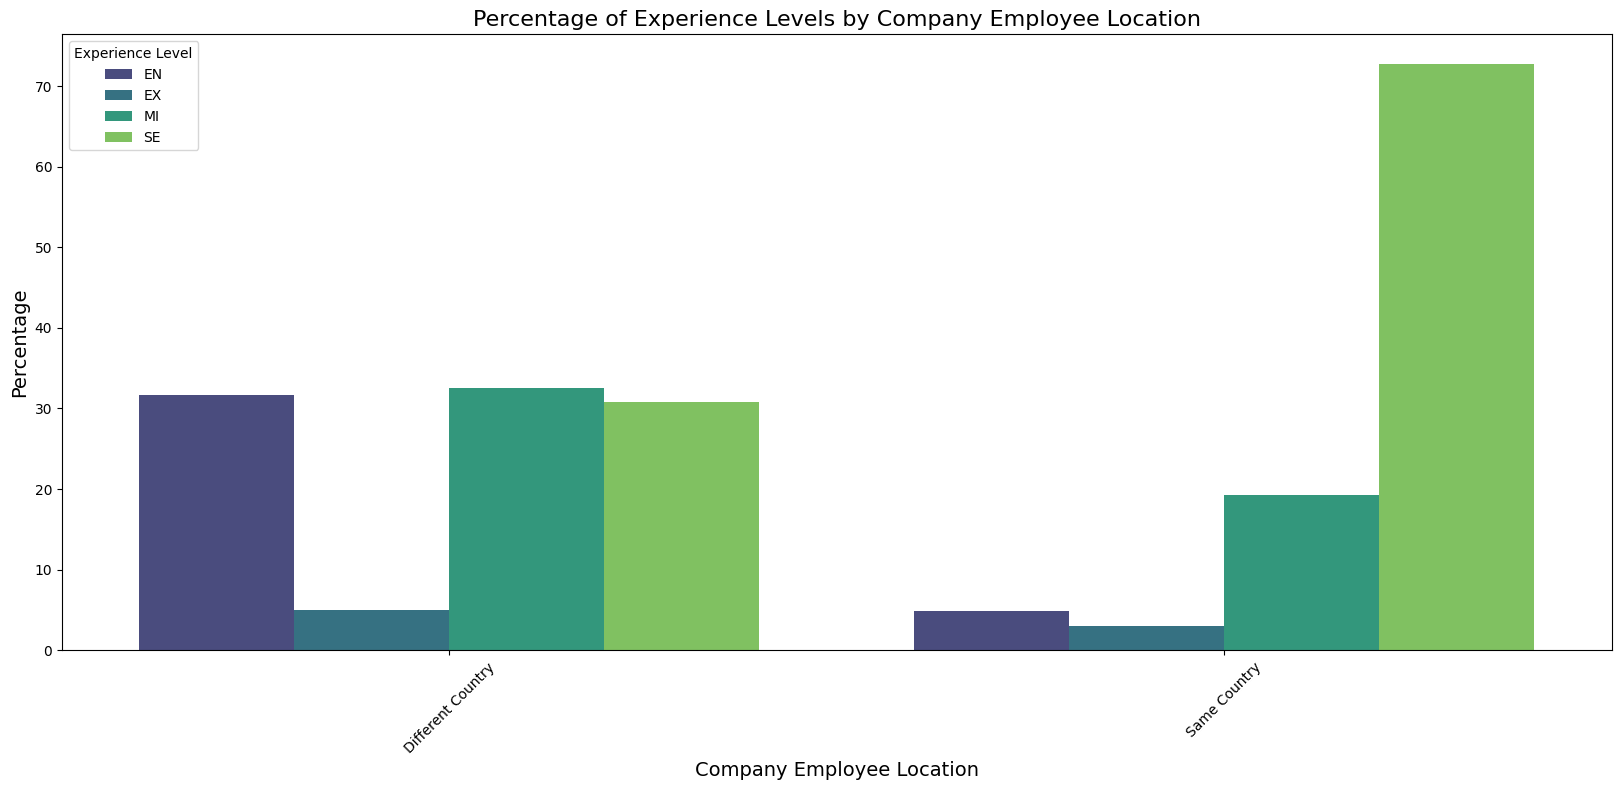

In [28]:
# Calculating the percentage of each experience level for each company employee location
grouped_data = data.groupby(['company_employee_location', 'experience_level']).size().reset_index(name='count')
total_counts = grouped_data.groupby('company_employee_location')['count'].sum().reset_index(name='total_count')
merged_data = pd.merge(grouped_data, total_counts, on='company_employee_location')
merged_data['percentage'] = (merged_data['count'] / merged_data['total_count']) * 100


# Creating a grouped bar plot for experience levels showing percentages
plt.figure(figsize=(20,8))

sns.barplot(data=merged_data, x='company_employee_location', y='percentage', hue='experience_level', palette='viridis')

plt.title('Percentage of Experience Levels by Company Employee Location', fontsize=16)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Company Employee Location', fontsize=14)
plt.tick_params(axis='x', rotation=45)
plt.legend(title='Experience Level')
plt.show()


Location & Salary Results

In the evaluation of the top 10 company locations based on the volume of job openings, the United States (US) stands out as the location offering the highest mean salary, with Canada (CA) and the United Kingdom (GB) trailing closely behind. On the flip side, India (IN), Portugal (PT), and Spain (ES) appear to present the lowest mean salaries among the analyzed locations. This discrepancy in salaries could potentially stem from regional economic variances, industry-specific concentrations, or differences in living costs among these countries. However, drawing conclusive insights would necessitate a careful consideration of various other factors and contextual elements.

Interestingly, when delving into the data, it is observed that companies in the US, CA, AU, GB, and DE, which top the charts in terms of average salary offerings, seem to pay their employees, on average, only half the wage when the company and employee locations differ. With further analysis we can conclude that employees residing in a different country predominantly preferred for entry-level positions and have significantly fewer senior-level positions compared to the rest of the dataset. This observation aligns with the wage disparity.

## Final Conclusions

1. Data Distribution Overview:
The dataset predominantly represents the year 2023 (76.1%) and medium-sized businesses (89.2%). Remote and senior-level positions are notably prevalent, constituting 58.8% and 72.2% of the data respectively.

2. Salary Distribution Insights:
The salary data is slightly right-skewed with an average of ~150k USD and a standard deviation of ~65k USD. Uneven distributions in certain metrics indicate areas for detailed exploration.

3. Experience and Salary Correlation:
A moderate connection is observed between an individual's experience and their salary, establishing that more experience typically translates to higher compensation. However, inconsistencies are noted, such as 'Principal Data Scientist' roles not necessarily having higher seniority yet commanding substantial pay, suggesting the value of specialized skills.

4. Work Model's Influence on Compensation:
Remote positions slightly lead in average salary offerings, possibly reflecting companies' cost savings. Conversely, hybrid roles, making up 2.7% of the dataset, present the lowest mean salary, an outcome potentially influenced by the predominance of entry-level positions in this category.

5. Company Size's Impact on Salary:
Medium-sized businesses emerge as the top paymasters, with small-sized businesses trailing. Large businesses exhibit a lower mean salary compared to medium-sized businesses. However, the underrepresentation of large (8.7%) and small-sized (2.1%) companies in the data cautions against making sweeping conclusions.

6. Job Title and Salary Dynamics:
Distinct salary disparities are noted across job titles, with roles such as "Research Scientist" and "ML Engineer" significantly outpacing "Data Manager" and "Data Analyst" in compensation. This indicates that specialized skills and responsibilities might be commanding higher market premiums.

7. Location-Based Salary Variations:
The US, Canada, and the UK surface as the top regions in terms of average salary. Interestingly, a marked wage discrepancy is observed when companies and employees are based in different countries, reflecting possible preferences for hiring entry-level positions from overseas.

Final Thoughts:
While certain trends and correlations emerge, such as experience influencing salary and remote positions paying slightly higher, the dataset's limitations necessitate cautious interpretation. Additional studies encompassing a broader set of factors like industry, geographic location, and company size may provide a more holistic understanding of the observed salary dynamics.